# Group Member: Ting Lin, Joshua Barlow
## Airline Comparison

# Data Identification and Collection
Use web scraping from www.airlineratings.com to collect desired data for Qatar Airways and American Airlines

In [1]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
import re

In [2]:
# get access to the website
r = requests.get('https://www.airlineratings.com/passenger-reviews/qatar-airways/page/1')
data = html.fromstring(r.text)

# Xpath to pull specific data from the webpage
rating = data.xpath("//div[@class='passenger_rating_overall']/h4/text()")
cabin = data.xpath("//p[@class='cabin_flown']/text()")
review = data.xpath("//div[@class='passenger_review_body']/p/text()")
date = data.xpath("//span[@class='review_date']/text()")
recommend = data.xpath("//div[@class='passenger_recommendation']/span/text()")
value_for_money = data.xpath("//ul/li[1]/div/div/@style")
seat_space = data.xpath("//ul/li[2]/div/div/@style")
cust_serv = data.xpath("//ul/li[3]/div/div/@style")
entertainment = data.xpath("//ul/li[4]/div/div/@style")
food_drink = data.xpath("//ul/li[5]/div/div/@style")

# aggregate the columns so they are together
test = zip(date,rating,cabin,review,recommend,value_for_money,seat_space,cust_serv,entertainment,food_drink)
# changing the data more like Excel format
test = pd.DataFrame(test)
# save
test.to_csv("data/qatar_reviews_test.csv", encoding='utf-8')

test

,0,1,2,3,4,5,6,7,8,9
0,"December 1, 2017",8/10,Flew Economy Class,The flight booking through my agent was a bree...,Yes,width: 80%,width: 40%,width: 100%,width: 80%,width: 40%
1,"November 27, 2017",2/10,Flew Economy Class,I would not recommend Qatar Airways to any Aus...,No,width: 60%,width: 60%,width: 20%,width: 60%,width: 60%
2,"October 17, 2017",10/10,Flew Economy Class,Flight from QATAR to MEDINAH was very great………...,Yes,width: 80%,width: 100%,width: 100%,width: 100%,width: 100%
3,"October 4, 2017",10/10,Flew Economy Class,Flew Economy NZ to Dublin through Doha. Asked ...,Yes,width: 100%,width: 100%,width: 100%,width: 100%,width: 100%
4,"September 30, 2017",1/10,Flew Economy Class,Our flight from Sydney to Madrid was delayed b...,No,width: 20%,width: 80%,width: 20%,width: 100%,width: 80%


In [3]:
# use a for loop to ensure the webpages generate properly
a = "https://www.airlineratings.com/passenger-reviews/qatar-airways/page/"

for i in range(1,10):
    print '%s%s' %(a,i)

https://www.airlineratings.com/passenger-reviews/qatar-airways/page/1
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/2
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/3
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/4
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/5
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/6
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/7
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/8
https://www.airlineratings.com/passenger-reviews/qatar-airways/page/9


In [4]:
# Utilize web scraping to pull the desired data and put it into a table
qatar_data = []

# use a for loop to cycle through the review pages
a = "http://www.airlineratings.com/passenger-reviews/qatar-airways/page/"

for i in range(1,52):
    url = '%s%s' %(a,i)
    headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }
    data = html.fromstring(requests.get(url, headers=headers).text)
    
    # Xpath to pull specific data from the webpage
    rating = data.xpath("//div[@class='passenger_rating_overall']/h4/text()")
    cabin = data.xpath("//p[@class='cabin_flown']/text()")
    review = data.xpath("//div[@class='passenger_review_body']/p/text()")
    date = data.xpath("//span[@class='review_date']/text()")
    recommend = data.xpath("//div[@class='passenger_recommendation']/span/text()")
    value_for_money = data.xpath("//ul/li[1]/div/div/@style")
    seat_space = data.xpath("//ul/li[2]/div/div/@style")
    cust_serv = data.xpath("//ul/li[3]/div/div/@style")
    entertainment = data.xpath("//ul/li[4]/div/div/@style")
    food_drink = data.xpath("//ul/li[5]/div/div/@style")

    df = zip(date, rating, cabin, review, recommend, value_for_money, seat_space, cust_serv, entertainment, food_drink)
    
    for row in df:
        qatar_data.append(row)

qatar_data = pd.DataFrame(qatar_data)

# save the data to a csv file and display
qatar_data.to_csv("data/output_qatar_reviews.csv", encoding="utf-8")
qatar_data.head()

,0,1,2,3,4,5,6,7,8,9
0,"December 1, 2017",8/10,Flew Economy Class,The flight booking through my agent was a bree...,Yes,width: 80%,width: 40%,width: 100%,width: 80%,width: 40%
1,"November 27, 2017",2/10,Flew Economy Class,I would not recommend Qatar Airways to any Aus...,No,width: 60%,width: 60%,width: 20%,width: 60%,width: 60%
2,"October 17, 2017",10/10,Flew Economy Class,Flight from QATAR to MEDINAH was very great………...,Yes,width: 80%,width: 100%,width: 100%,width: 100%,width: 100%
3,"October 4, 2017",10/10,Flew Economy Class,Flew Economy NZ to Dublin through Doha. Asked ...,Yes,width: 100%,width: 100%,width: 100%,width: 100%,width: 100%
4,"September 30, 2017",1/10,Flew Economy Class,Our flight from Sydney to Madrid was delayed b...,No,width: 20%,width: 80%,width: 20%,width: 100%,width: 80%


In [5]:
# Utilize web scraping to pull the desired data and put it into a table
american_data = []

a = "https://www.airlineratings.com/passenger-reviews/american-airlines/page/"

# use a for loop to cycle through the review pages
for i in range(1,116):
    url = '%s%s' %(a,i)
    headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }
    data = html.fromstring(requests.get(url, headers=headers).text)
    
    # Xpath to pull specific data from the webpage
    rating = data.xpath("//div[@class='passenger_rating_overall']/h4/text()")
    cabin = data.xpath("//p[@class='cabin_flown']/text()")
    review = data.xpath("//div[@class='passenger_review_body']/p/text()")
    date = data.xpath("//span[@class='review_date']/text()")
    recommend = data.xpath("//div[@class='passenger_recommendation']/span/text()")
    value_for_money = data.xpath("//ul/li[1]/div/div/@style")
    seat_space = data.xpath("//ul/li[2]/div/div/@style")
    cust_serv = data.xpath("//ul/li[3]/div/div/@style")
    entertainment = data.xpath("//ul/li[4]/div/div/@style")
    food_drink = data.xpath("//ul/li[5]/div/div/@style")

    df = zip(date, rating, cabin, review, recommend, value_for_money, seat_space, cust_serv, entertainment, food_drink)
    
    for row in df:
        american_data.append(row)

american_data = pd.DataFrame(american_data)

american_data.to_csv("data/output_american_reviews.csv", encoding="utf-8")
american_data.head()

,0,1,2,3,4,5,6,7,8,9
0,"December 1, 2017",1/10,Flew Economy Class,"Try not to fly with them. Dirty planes, poor s...",No,width: 20%,width: 40%,width: 20%,width: 0%,width: 20%
1,"November 24, 2017",1/10,Flew Economy Class,"Booked a seat, Oh no a ticket on the plane it ...",No,width: 20%,width: 20%,width: 20%,width: 60%,width: 20%
2,"November 10, 2017",1/10,Flew First Class,This is an airline that appears to be struggli...,No,width: 40%,width: 60%,width: 20%,width: 40%,width: 40%
3,"November 4, 2017",5/10,Flew First Class,"I recently flew with American Airlines, Busine...",No,width: 80%,width: 100%,width: 20%,width: 100%,width: 80%
4,"October 19, 2017",1/10,Flew Economy Class,The worst I’ve ever experienced truly terrible...,No,width: 60%,width: 20%,width: 20%,width: 80%,width: 60%


# Business and Data Understanding  

Business question: Business Insider rated Qatar Airways as the number one airline in the world. We want to look at customer reviews for them and analyze the data using topic modeling, sentiment analysis, etc. to find out what makes them number one. We will then compare this to another airline (American Airline) to find out what they need to focus on to improve customer satisfaction.  
The source of dataset: We will collect data from airlineratings.com.  
The technique(s) of data collection to be used: Data collection method will be web crawling for this project.  
The types of data analysis techniques to be used will be descriptive analytics (data visualization, basic statistics, and word frequency), unsupervised content analytics (topic modeling, sentiment analysis, etc.), and network analytics (network visualization).  
Expected benefits & Potential Clients: This can benefit the airline that is compared to Qatar Airways. They will be able to see what specific areas they are lacking in and be able to improve based on what Qatar Airways does.


# Data Cleaning & Text Preprocessing  
(e.g., tokenization, stopword)

In [6]:
# renaming the columns and cleaning up the data so it is usable
airline_qatar = qatar_data

airline_qatar = airline_qatar.rename(columns={0: 'Date', 1: 'Overall_Rating', 2: 'Cabin', 3:'Review', 4:'Recommended', 
                                              5:'ValueForMoney', 6:'Seat_Space', 7:'Cust_Serv', 8:'Entertainment', 
                                              9:'Food_Drink'})       

# convert the date column to date datatype
airline_qatar['Date'] = pd.to_datetime(airline_qatar['Date'])

# convert the overall rating column to string so the last 3 digits can be removed ("/10"), then convert back to integer
airline_qatar['Overall_Rating'] = airline_qatar['Overall_Rating'].astype(str).str[:-3].astype(int)

# remove "Flew" from the Cabin column (just a little housekeeping)
airline_qatar['Cabin'] = airline_qatar['Cabin'].str.replace("Flew ", '')
airline_qatar['Cabin'] = airline_qatar['Cabin'].str.replace(" Class", '')

# changing categorical values with map
airline_qatar['Recommended'] = airline_qatar['Recommended'].map({'No': 0, 'Yes': 1}).astype(int)

# remove everything except the numbers in the last five columns and makes them integers (makes it " " out of 5 stars)
airline_qatar['ValueForMoney'] = airline_qatar['ValueForMoney'].str.replace(r'[\D]', '').astype(int)
airline_qatar['Seat_Space'] = airline_qatar['Seat_Space'].str.replace(r'[\D]', '').astype(int)
airline_qatar['Cust_Serv'] = airline_qatar['Cust_Serv'].str.replace(r'[\D]', '').astype(int)
airline_qatar['Entertainment'] = airline_qatar['Entertainment'].str.replace(r'[\D]', '').astype(int)
airline_qatar['Food_Drink'] = airline_qatar['Food_Drink'].str.replace(r'[\D]', '').astype(int)

# divide those columns by 20 (this gives us the number of stars for that rating)
for i, row in airline_qatar.iterrows():
    airline_qatar.loc[i, 'ValueForMoney'] /= 20
for i, row in airline_qatar.iterrows():
    airline_qatar.loc[i, 'Seat_Space'] /= 20        
for i, row in airline_qatar.iterrows():
    airline_qatar.loc[i, 'Cust_Serv'] /= 20   
for i, row in airline_qatar.iterrows():
    airline_qatar.loc[i, 'Entertainment'] /= 20   
for i, row in airline_qatar.iterrows():
    airline_qatar.loc[i, 'Food_Drink'] /= 20
    
airline_qatar.head()

,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,8,Economy,The flight booking through my agent was a bree...,1,4,2,5,4,2
1,2017-11-27,2,Economy,I would not recommend Qatar Airways to any Aus...,0,3,3,1,3,3
2,2017-10-17,10,Economy,Flight from QATAR to MEDINAH was very great………...,1,4,5,5,5,5
3,2017-10-04,10,Economy,Flew Economy NZ to Dublin through Doha. Asked ...,1,5,5,5,5,5
4,2017-09-30,1,Economy,Our flight from Sydney to Madrid was delayed b...,0,1,4,1,5,4


In [7]:
# remove unwanted words and characters for data analysis later
airline_qatar['Review'] = airline_qatar['Review'].str.replace('\d+', ' ')
airline_qatar['Review'] = airline_qatar['Review'].str.replace('[^a-zA-Z]+', ' ')
airline_qatar['Review'] = airline_qatar['Review'].str.findall('\w{3,}').str.join(' ')

airline_qatar.head()

,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,8,Economy,The flight booking through agent was breeze an...,1,4,2,5,4,2
1,2017-11-27,2,Economy,would not recommend Qatar Airways any Australi...,0,3,3,1,3,3
2,2017-10-17,10,Economy,Flight from QATAR MEDINAH was very great the o...,1,4,5,5,5,5
3,2017-10-04,10,Economy,Flew Economy Dublin through Doha Asked Doha ai...,1,5,5,5,5,5
4,2017-09-30,1,Economy,Our flight from Sydney Madrid was delayed hour...,0,1,4,1,5,4


In [8]:
# renaming the columns and cleaning up the data so it is usable
airline_american = american_data

airline_american = airline_american.rename(columns={0: 'Date', 1: 'Overall_Rating', 2: 'Cabin', 3:'Review', 4:'Recommended',
                                                    5:'ValueForMoney', 6:'Seat_Space', 7:'Cust_Serv', 8:'Entertainment', 
                                                    9:'Food_Drink'})       

# convert the date column to date datatype
airline_american['Date'] = pd.to_datetime(airline_american['Date'])

# convert the overall rating column to string so the last 3 digits can be removed ("/10"), then convert back to integer
airline_american['Overall_Rating'] = airline_american['Overall_Rating'].astype(str).str[:-3].astype(int)

# remove "Flew" and "Class" from the Cabin column (just a little housekeeping)
airline_american['Cabin'] = airline_american['Cabin'].str.replace("Flew ", '')
airline_american['Cabin'] = airline_american['Cabin'].str.replace(" Class", '')

# changing categorical values with map
airline_american['Recommended'] = airline_american['Recommended'].map({'No': 0, 'Yes': 1})

# removes everything except the numbers in the last five columns and makes them integers
airline_american['ValueForMoney'] = airline_american['ValueForMoney'].str.replace(r'[\D]', '').astype(int)
airline_american['Seat_Space'] = airline_american['Seat_Space'].str.replace(r'[\D]', '').astype(int)
airline_american['Cust_Serv'] = airline_american['Cust_Serv'].str.replace(r'[\D]', '').astype(int)
airline_american['Entertainment'] = airline_american['Entertainment'].str.replace(r'[\D]', '').astype(int)
airline_american['Food_Drink'] = airline_american['Food_Drink'].str.replace(r'[\D]', '').astype(int)

# divide those columns by 20 (this gives us the number of stars for that rating)
for i, row in airline_american.iterrows():
    airline_american.loc[i, 'ValueForMoney'] /= 20
for i, row in airline_american.iterrows():
    airline_american.loc[i, 'Seat_Space'] /= 20        
for i, row in airline_american.iterrows():
    airline_american.loc[i, 'Cust_Serv'] /= 20   
for i, row in airline_american.iterrows():
    airline_american.loc[i, 'Entertainment'] /= 20   
for i, row in airline_american.iterrows():
    airline_american.loc[i, 'Food_Drink'] /= 20   

airline_american.head()

,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,1,Economy,"Try not to fly with them. Dirty planes, poor s...",0,1,2,1,0,1
1,2017-11-24,1,Economy,"Booked a seat, Oh no a ticket on the plane it ...",0,1,1,1,3,1
2,2017-11-10,1,First,This is an airline that appears to be struggli...,0,2,3,1,2,2
3,2017-11-04,5,First,"I recently flew with American Airlines, Busine...",0,4,5,1,5,4
4,2017-10-19,1,Economy,The worst I’ve ever experienced truly terrible...,0,3,1,1,4,3


In [9]:
# remove unwanted words and characters for data analysis later
airline_american['Review'] = airline_american['Review'].str.replace('\d+', ' ')
airline_american['Review'] = airline_american['Review'].str.replace('[^a-zA-Z]+', ' ')
airline_american['Review'] = airline_american['Review'].str.findall('\w{3,}').str.join(' ')

airline_american.head()

,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,1,Economy,Try not fly with them Dirty planes poor servic...,0,1,2,1,0,1
1,2017-11-24,1,Economy,Booked seat ticket the plane was not seat was ...,0,1,1,1,3,1
2,2017-11-10,1,First,This airline that appears struggling just many...,0,2,3,1,2,2
3,2017-11-04,5,First,recently flew with American Airlines Business ...,0,4,5,1,5,4
4,2017-10-19,1,Economy,The worst ever experienced truly terrible freq...,0,3,1,1,4,3


We now have data that is easy to analyze. The Recommended column was converted to a "0" or "1" to enable easy comparison. The Value for Money, Seat Space, Customer Service, Entertainment, and Food/Drink were converted from 0-5 star ratings into a 0-5 scale making it usable. And the reviews were cleaned to remove unwanted common words.

In [51]:
# redefine the data sets so they are not overwritten. This prevents having to pull the data over and over
df1 = airline_qatar
df2 = airline_american
texts = df1['Review']
texts2 = df2['Review']
texts = [ i for i in texts ]
texts2 = [i for i in texts2]

In [52]:
import pandas as pd
import csv
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [53]:
# tokenize
texts = [[word for word in text.lower().split() ] for text in texts]
texts2 = [[word for word in text.lower().split() ] for text in texts2]

lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
texts2 = [[lmtzr.lemmatize(word) for word in text ] for text in texts2]

stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
texts2 = [[word for word in text if word not in stoplist] for text in texts2]

In [54]:
# A list of extra stopwords specific to the reviews (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way',
                   'president', 'want', 'like','say','got','said','just','something','tell','put','now', 'bad','back','want',
                   'right','every','one','use','come','never', 'many','along','things','day','also','first','guy', 'great', 
                   'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america', 'talk', 'talking', 'thank',
                   'does', 'give', 'look', 'believe', 'tonight','today','see','that', 'this', 'em', 'wa', 'http', 'com', 'que',
                   'one', 'want', 'would', 'also', 'unless','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
                   'book','ply','flying','what','yep','yer','aest','didn','nzdt','via','typed', 'impact','alongside','list',
                   'range', 'one','com','new','like','great','make','top', 'question', 'answer', 'tonight', 'american',
                   'tomorrow', 'good','wow','yes','say','yay','would','thanks','thank','going', 'learned', 'another','apart',
                   'iyi', 'yle', 'new','use','should','could','really','see','want','nice', 'able', 'airline', 'made', 
                   'called','two', 'while','know','free','today','day','always','last','put','live', 'trip', 'due', 'ask',
                   'asked', 'help', 'week','went','wasn','was','used','ugh','try','kind', 'http','much', 'airline', 'fly',
                   'need', 'next','app','ibm','appleevent','using','talk','film', 'totally','seen', 'told','yet','stll', 
                   'non', 'hour', 'time', 'take', 'movie', 'even', 'give','reminded', 'year', 'pre', 'saw', 'created',
                   'create', 'come', 'real', 'etc', 'cinema', 'everything', 'fit', 'buy', 'tell', 'including', 'finally',
                   'guess', 'also', 'lot', 'plenty', 'someone','onto', 'every', 'everywhere', 'thought', 'watched', 'look',
                   'caught', 'love', 'loved', 'gave', 'per', 'actor', 'anyone', 'else', 'think', 'airlines','review','focus',
                   'act', 'dose','ever','thing','never', 'show','maintains','watch','added','justiced', 'action', 'doha', 'flight',
                   'airway', 'qatar', 'perth', 'melbourne', 'london']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]
texts2 = [[word for word in text if word not in extra_stoplist] for text in texts2]

# Descriptive Analytics


First we will look at each airline and get the average ratings for each category.

In [66]:
# Display the average ratings for each category for Qatar
sum_row = airline_qatar[["Overall_Rating", "ValueForMoney","Seat_Space","Cust_Serv","Entertainment", "Food_Drink"]].mean()
print ("Qatar Airline rating averages:")
sum_row

Qatar Airline rating averages:


Overall_Rating    5.196078
ValueForMoney     3.125490
Seat_Space        3.254902
Cust_Serv         3.235294
Entertainment     3.250980
Food_Drink        3.235294
dtype: float64

In [68]:
# Display the average ratings for each category for American
sum_row2=airline_american[["Overall_Rating", "ValueForMoney","Seat_Space","Cust_Serv","Entertainment", "Food_Drink"]].mean()
sum_row2

Overall_Rating    2.259130
ValueForMoney     1.784348
Seat_Space        2.349565
Cust_Serv         2.151304
Entertainment     1.417391
Food_Drink        1.902609
dtype: float64

Next we will generate groupby tables which will display the average ratings for each airline, along with the number of people who would recommend the airline broken up by cabin.

In [67]:
# Qatar groupby shows the average rating for each section broken up by cabin and whether it is recommended or not

count = airline_qatar.groupby('Cabin')['Recommended'].value_counts().reset_index(name='Count').reset_index()

qatar_summary = airline_qatar.groupby(['Cabin', 'Recommended'])[["Overall_Rating", "ValueForMoney", "Seat_Space", 
                                    "Cust_Serv", "Entertainment", "Food_Drink"]].mean().reset_index()
qatar_summary = pd.merge(qatar_summary, count, on=['Cabin', 'Recommended'])
qatar_summary =  qatar_summary[['Cabin', 'Recommended', 'Count', 'Overall_Rating', 'ValueForMoney', 'Seat_Space', 
                                    'Cust_Serv', 'Entertainment', 'Food_Drink']]
qatar_summary

,Cabin,Recommended,Count,Overall_Rating,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,0,16,1.500000,1.562500,2.812500,2.250000,2.875000,2.687500
1,Business,1,29,8.965517,4.655172,4.482759,4.551724,3.517241,4.551724
2,Economy,0,117,2.341880,2.000000,2.376068,2.094017,2.555556,2.350427
3,Economy,1,88,8.397727,4.397727,4.056818,4.454545,4.136364,4.068182
4,First,1,1,10.000000,5.000000,5.000000,5.000000,4.000000,5.000000
5,Premium Economy,0,2,1.000000,1.000000,3.000000,3.000000,2.500000,2.500000
6,Premium Economy,1,2,8.000000,4.500000,4.500000,4.500000,4.500000,3.500000


In [69]:
# American groupby shows the average rating for each section broken up by cabin and whether it is recommended or not

count = airline_american.groupby('Cabin')['Recommended'].value_counts().reset_index(name='Count').reset_index()

american_summary = airline_american.groupby(['Cabin', 'Recommended'])[["ValueForMoney", "Seat_Space", "Cust_Serv",
                                            "Entertainment", "Food_Drink"]].mean().reset_index()
american_summary = pd.merge(american_summary, count, on=['Cabin', 'Recommended'])
american_summary = american_summary[['Cabin', 'Recommended', 'Count','ValueForMoney', 'Seat_Space', 'Cust_Serv', 
                                    'Entertainment', 'Food_Drink']]
american_summary

,Cabin,Recommended,Count,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,0,23,1.434783,2.608696,1.826087,1.608696,2.130435
1,Business,1,13,4.153846,4.076923,4.153846,1.923077,2.846154
2,Economy,0,415,1.433735,1.995181,1.836145,1.190361,1.609639
3,Economy,1,47,4.085106,3.914894,4.425532,2.659574,3.531915
4,First,0,25,1.600000,2.520000,1.840000,1.400000,1.840000
5,First,1,9,4.555556,4.777778,4.666667,2.777778,4.111111
6,Premium Economy,0,40,1.425000,2.675000,1.775000,1.625000,1.950000
7,Premium Economy,1,3,4.666667,4.333333,4.000000,3.000000,4.333333


The following are heatmaps which show the correlation between each category.

C:\Users\joshb\Anaconda2\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\joshb\Anaconda2\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


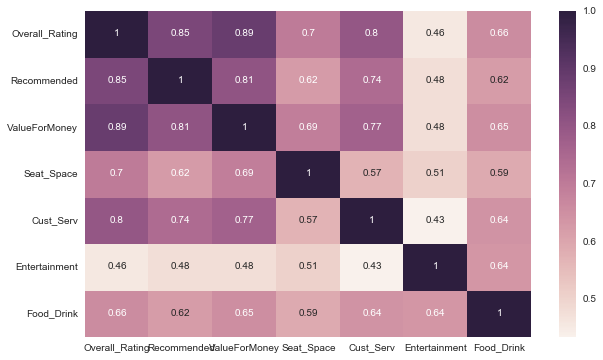

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(airline_qatar.corr(), annot=True)

C:\Users\joshb\Anaconda2\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\joshb\Anaconda2\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


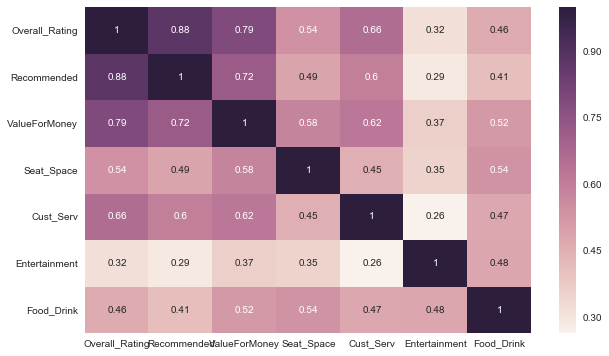

In [71]:
# American Airlines Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(airline_american.corr(), annot=True)

The heatmaps above show that the customers are fairly consistent in the weight they put on each category versus the overall rating. Both airlines had the lowest correlations being entertainment and Food/Drink. 

Below are the overall percentages of the number of people who recommend the airlines. It is sometimes more reliable to look at a percentage due to the fact that there were roughly twice as many American Airline reviews than Qatar reviews.

In [73]:
# print the overall percentage of people who recommend the Qatar airline

count = 0
for i in airline_qatar['Recommended']:
    if i == 1:
        count+=1
percentage = float(float(count)/float(len(airline_qatar)))
print '%s %s %s' %("Qatar percentage of people who recommend airline: ", "%.1f" % (percentage*100),"%")

Qatar percentage of people who recommend airline:  47.1 %


In [74]:
# print the overall percentage of people who recommend American airline

count = 0
for i in airline_american['Recommended']:
    if i == 1:
        count+=1
percentage = float(float(count)/float(len(airline_american)))
print '%s %s %s' %("American Percentage of people who recommend airline: ", "%.1f" % (percentage*100),"%")

American Percentage of people who recommend airline:  12.5 %


The above shows that American airlines has a significantly lower percentage of "Yes" recommendations" (roughly 1/4)

Now we can look at the number of high overall ratings (>7) and compare that to whether the customer have a "Yes" or "No" recommendation.

In [143]:
# qatar, print the number of Overall Ratings above 7
qatar_highscores = airline_qatar[airline_qatar['Overall_Rating'] > 7]
print len(qatar_highscores)
print ("Percentage of Qatar ratings higher than 7: {}".format(float(float(len(qatar_highscores))) / (float(airline_qatar['Overall_Rating'].count()))*100))
qatar_highscores.head()

98
Percentage of Qatar ratings higher than 7: 38.431372549


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,8,Economy,The flight booking through agent was breeze an...,1,4,2,5,4,2
2,2017-10-17,10,Economy,Flight from QATAR MEDINAH was very great the o...,1,4,5,5,5,5
3,2017-10-04,10,Economy,Flew Economy Dublin through Doha Asked Doha ai...,1,5,5,5,5,5
7,2017-08-16,9,Economy,Comparing other flights etihad and emirates Qa...,1,4,4,4,4,4
10,2017-08-16,10,Business,delighted that this airline now flying out Ade...,1,5,5,5,4,4


In [76]:
#Recommend
recommend = airline_qatar[airline_qatar['Recommended'] == 1]
#print ("Number of customers who would recommend Qatar Airways: {}".format(len(recommend)))
print len(recommend)
print ("Percentage of customers who would recommend Qatar Airways: {}".format(float(float(len(recommend))) / (float(airline_qatar['Overall_Rating'].count()))*100))
recommend.head()

120
Percentage of customers who would recommend Qatar Airways: 47.0588235294


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,8,Economy,The flight booking through agent was breeze an...,1,4,2,5,4,2
2,2017-10-17,10,Economy,Flight from QATAR MEDINAH was very great the o...,1,4,5,5,5,5
3,2017-10-04,10,Economy,Flew Economy Dublin through Doha Asked Doha ai...,1,5,5,5,5,5
7,2017-08-16,9,Economy,Comparing other flights etihad and emirates Qa...,1,4,4,4,4,4
10,2017-08-16,10,Business,delighted that this airline now flying out Ade...,1,5,5,5,4,4


In [77]:
# Qatar Highscores and recommend
hiscore_recom = airline_qatar[(airline_qatar['Overall_Rating'] > 7) & (airline_qatar['Recommended'] == 1)]
print len(hiscore_recom)
print (float(len(hiscore_recom) / (float(airline_qatar['Overall_Rating'].count())))*100)

hiscore_recom.head()

97
38.0392156863


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,8,Economy,The flight booking through agent was breeze an...,1,4,2,5,4,2
2,2017-10-17,10,Economy,Flight from QATAR MEDINAH was very great the o...,1,4,5,5,5,5
3,2017-10-04,10,Economy,Flew Economy Dublin through Doha Asked Doha ai...,1,5,5,5,5,5
7,2017-08-16,9,Economy,Comparing other flights etihad and emirates Qa...,1,4,4,4,4,4
10,2017-08-16,10,Business,delighted that this airline now flying out Ade...,1,5,5,5,4,4


The above data shows that although 98 people gave Qatar a rating above 7, only 97 of those customers gave a "Yes" recommendation.

Below is a table showing the number of scores above a 7 with a yes recommendation, broken down by what cabin the customer flew in.

In [78]:
# Qatar
count = hiscore_recom.groupby('Cabin').count().reset_index()
count

,Cabin,Date,Overall_Rating,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,24,24,24,24,24,24,24,24,24
1,Economy,71,71,71,71,71,71,71,71,71
2,First,1,1,1,1,1,1,1,1,1
3,Premium Economy,1,1,1,1,1,1,1,1,1


Now we'll look at the low scores for Qatar

In [79]:
# Qatar low scores and not recommend
loscore_nrecom = airline_qatar[(airline_qatar['Overall_Rating'] < 5) & (airline_qatar['Recommended'] == 0)]
print len(loscore_nrecom)
loscore_nrecom.head()

109


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
1,2017-11-27,2,Economy,would not recommend Qatar Airways any Australi...,0,3,3,1,3,3
4,2017-09-30,1,Economy,Our flight from Sydney Madrid was delayed hour...,0,1,4,1,5,4
5,2017-08-16,3,Economy,Absolutely appalling customer care and refusal...,0,1,3,2,0,1
6,2017-08-16,1,Economy,This first time booking with Qatar Airways wil...,0,1,0,0,0,0
8,2017-08-16,3,Economy,they have lied every Qatar airlines office hav...,0,2,3,1,3,3


In [80]:
# Qatar
count = loscore_nrecom.groupby('Cabin').count().reset_index()
count

,Cabin,Date,Overall_Rating,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,14,14,14,14,14,14,14,14,14
1,Economy,93,93,93,93,93,93,93,93,93
2,Premium Economy,2,2,2,2,2,2,2,2,2


The table above shows the nubmer of customers who gave an overall rating less than 5 and a no recommendation.

Below is the same information for American Airlines.

In [81]:
# American highscores
highscores2 = airline_american[airline_american['Overall_Rating'] > 7]
print len(highscores2)
highscores2.head()

59


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
6,2017-08-24,10,Premium Economy,This flight restored faith American Airlines A...,1,4,5,5,0,5
10,2017-08-16,9,Business,Flew from Chicago Heathrow JUL business class ...,1,5,4,5,4,4
11,2017-08-16,10,Economy,Seat was comfortable although bit narrow Cabin...,1,5,4,4,0,0
53,2017-07-15,10,Economy,Furthermore when registered were split the air...,1,3,4,4,4,4
60,2017-07-09,9,First,was flight from lex DFW Due seating issues wif...,1,5,5,5,5,4


In [82]:
#American Recommend
recommend2 = airline_american[airline_american['Recommended'] == 1]
print len(recommend2)
recommend2.head()

72


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
6,2017-08-24,10,Premium Economy,This flight restored faith American Airlines A...,1,4,5,5,0,5
10,2017-08-16,9,Business,Flew from Chicago Heathrow JUL business class ...,1,5,4,5,4,4
11,2017-08-16,10,Economy,Seat was comfortable although bit narrow Cabin...,1,5,4,4,0,0
39,2017-07-24,1,Economy,absurd that the flight time has been changed a...,1,1,3,2,0,0
53,2017-07-15,10,Economy,Furthermore when registered were split the air...,1,3,4,4,4,4


In [83]:
# American Highscores and recommend
hiscore_recom2 = airline_american[(airline_american['Overall_Rating'] > 7) & (airline_american['Recommended'] == 1)]
print len(hiscore_recom2)
hiscore_recom2.head()

58


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
6,2017-08-24,10,Premium Economy,This flight restored faith American Airlines A...,1,4,5,5,0,5
10,2017-08-16,9,Business,Flew from Chicago Heathrow JUL business class ...,1,5,4,5,4,4
11,2017-08-16,10,Economy,Seat was comfortable although bit narrow Cabin...,1,5,4,4,0,0
53,2017-07-15,10,Economy,Furthermore when registered were split the air...,1,3,4,4,4,4
60,2017-07-09,9,First,was flight from lex DFW Due seating issues wif...,1,5,5,5,5,4


This shows that there were 13 customers who did not give a rating greater than 7 but they still gave a "Yes" recommendation. This is evidence that there is a lot of variability when dealing with customer satisfaction.

In [84]:
# American
count = hiscore_recom2.groupby(['Cabin'])[["ValueForMoney", "Seat_Space", "Cust_Serv", "Entertainment", "Food_Drink"]].mean().reset_index()
#count = hiscore_recom2.groupby(['Hashtag', 'Theaters'])[["Followers", "Friends", "retweet"]].sum().reset_index()
count

,Cabin,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,4.800000,4.300000,4.700000,1.800000,2.800000
1,Economy,4.189189,4.000000,4.702703,2.972973,3.621622
2,First,4.555556,4.777778,4.666667,2.777778,4.111111
3,Premium Economy,4.500000,4.500000,5.000000,2.000000,4.500000


In [85]:
# American low scores and not recommend
loscore_nrecom2 = airline_american[(airline_american['Overall_Rating'] < 5) & (airline_american['Recommended'] == 0)]
print len(loscore_nrecom2)
loscore_nrecom2.head()

490


,Date,Overall_Rating,Cabin,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,2017-12-01,1,Economy,Try not fly with them Dirty planes poor servic...,0,1,2,1,0,1
1,2017-11-24,1,Economy,Booked seat ticket the plane was not seat was ...,0,1,1,1,3,1
2,2017-11-10,1,First,This airline that appears struggling just many...,0,2,3,1,2,2
4,2017-10-19,1,Economy,The worst ever experienced truly terrible freq...,0,3,1,1,4,3
5,2017-09-09,1,Economy,normally don give reviews public forems Howeve...,0,1,1,3,5,3


In [86]:
# American
count = loscore_nrecom2.groupby('Cabin').count().reset_index()
count

,Cabin,Date,Overall_Rating,Review,Recommended,ValueForMoney,Seat_Space,Cust_Serv,Entertainment,Food_Drink
0,Business,22,22,22,22,22,22,22,22,22
1,Economy,408,408,408,408,408,408,408,408,408
2,First,21,21,21,21,21,21,21,21,21
3,Premium Economy,39,39,39,39,39,39,39,39,39


Above is the data for American airlines displaying the number of customers who gave an overall rating less than 5 and did not recommend the airline. We can see that the majority of those reviews were from customers who flew in the Economy Class.

Next we'll look at a few plots to enable visual comparison of yes and no recommendations with each category rating.

#### Qatar

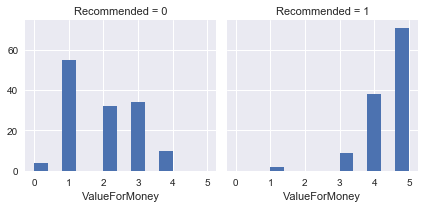

In [87]:
# FaceGrid
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

df1 = airline_qatar

g = sns.FacetGrid(df1, col="Recommended")
g.map(plt.hist, "ValueForMoney")

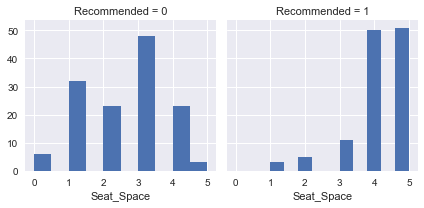

In [88]:
g = sns.FacetGrid(df1, col="Recommended")
g.map(plt.hist, "Seat_Space")

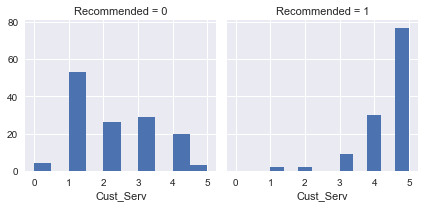

In [89]:
g = sns.FacetGrid(df1, col="Recommended")
g.map(plt.hist, "Cust_Serv")

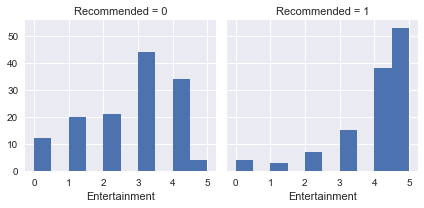

In [90]:
g = sns.FacetGrid(df1, col="Recommended")
g.map(plt.hist, "Entertainment")

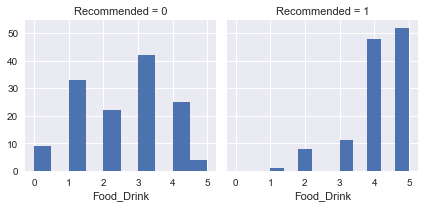

In [91]:
g = sns.FacetGrid(df1, col="Recommended")
g.map(plt.hist, "Food_Drink")

#### American

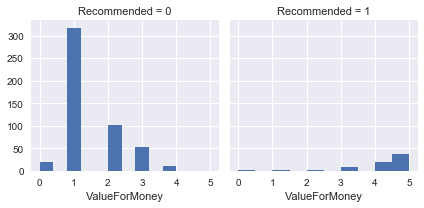

In [92]:
df2 = airline_american

g = sns.FacetGrid(df2, col="Recommended")
g.map(plt.hist, "ValueForMoney")

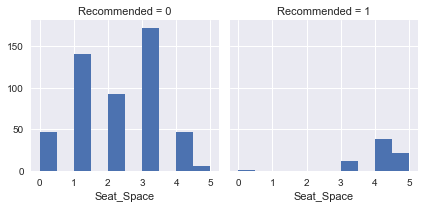

In [93]:
g = sns.FacetGrid(df2, col="Recommended")
g.map(plt.hist, "Seat_Space")

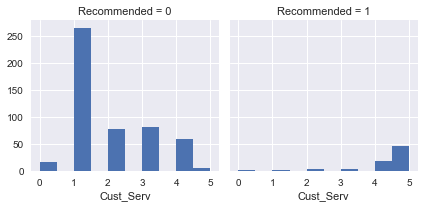

In [94]:
g = sns.FacetGrid(df2, col="Recommended")
g.map(plt.hist, "Cust_Serv")

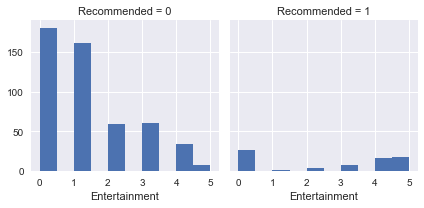

In [95]:
g = sns.FacetGrid(df2, col="Recommended")
g.map(plt.hist, "Entertainment")

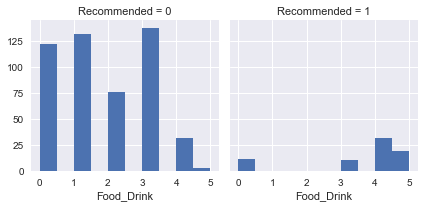

In [96]:
g = sns.FacetGrid(df2, col="Recommended")
g.map(plt.hist, "Food_Drink")

The charts above show that for the "Yes" recommendations, American airlines was actually judged pretty heavily on value for money, entertainment, and food/drink.

# Unsupervised Content Analytics 
▪ Topic modeling ▪ Sentiment analysis

## Topic Modeling
Next we'll look at both airlines and find the topics that were common in the customer reviews.

In [55]:
# this is text processing required for topic modeling with Gensim
## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary2 = Dictionary(texts2)

## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) 
dictionary2.filter_extremes(no_below=5, no_above=0.5) 
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpus2 = [dictionary2.doc2bow(text) for text in texts2]

In [56]:
# Number of tokens and reviews in Qatar data
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Number of tokens and reviews in American data
print('Number of unique tokens: %d' % len(dictionary2))
print('Number of documents: %d' % len(corpus2))

Number of unique tokens: 234
Number of documents: 255
Number of unique tokens: 679
Number of documents: 575


In [57]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

In [58]:
%%capture output
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=35, passes=50)

In [59]:
%%capture output
# print words without probability
for i in range(0,35):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

In [60]:
# Display the 35 topics for the Qatar data
output.show()

food, entertainment, keep, staff, air, economy, experience, system, travelled, comfortable
emirate, different, reason, company, better, card, experience, paid, ticket, travelling
worst, screen, old, food, aircraft, drink, passenger, doh, child, better
seat, family, plane, comfortable, booked, cramped, offer, journey, passenger, leg
seat, line, tried, sleep, crew, staff, star, customer, hotel, drink
air, excellent, passenger, find, service, polite, completely, seat, cabin, quite
crew, cabin, passenger, landing, definitely, food, airport, meal, service, long
baggage, worst, boarding, food, service, travelled, problem, check, definitely, adelaide
dubai, flew, travel, travelled, life, selection, aircraft, compensation, offer, hotel
meal, cabin, amazing, experience, star, crew, emirate, service, food, passenger
seat, leg, crew, food, quality, flew, poor, meal, bangkok, second
experience, best, row, air, travel, terrible, number, feel, food, class
crew, airport, delayed, member, meal, wait, 

In [61]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

C:\Users\joshb\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
10     7.193918        1       1 -0.095178 -0.015707
9      5.907438        1       2 -0.097347 -0.163151
20     5.418312        1       3 -0.006132 -0.035120
14     5.111320        1       4  0.071880 -0.017608
4      4.956018        1       5 -0.081490  0.057169
3      4.839941        1       6 -0.141506  0.181372
13     4.349099        1       7 -0.040896 -0.052038
21     4.208347        1       8 -0.054123 -0.032200
6      4.148895        1       9 -0.095537 -0.118863
25     3.437990        1      10  0.030155  0.251851
0      3.422281        1      11 -0.066435 -0.096655
12     3.274146        1      12 -0.062051  0.088660
27     3.246990        1      13  0.055489  0.080968
18     2.917926        1      14 -0.124986 -0.015555
7      2.850066        1      15 -0.041221 -0.025844
24     2.819283        1      16 -0.067519  0.064615
33     2.807080        1      17  0.196656  0.144743
17     2.656033        1      18  0.122370 -0.144801
2      2.409288        1      19 -0.120626 -0.039444
5      2.400665        1      20 -0.120404 -0.030385
30     2.176078        1      21  0.110493 -0.158508
15     2.159581        1      22 -0.161917 -0.007978
23     2.058632        1      23 -0.064703  0.006050
28     2.024715        1      24  0.143673  0.058773
11     1.907264        1      25  0.062761 -0.104565
26     1.592716        1      26  0.114419 -0.039006
22     1.567316        1      27 -0.047605  0.059826
31     1.451945        1      28  0.039176  0.067130
32     1.448599        1      29  0.155083 -0.098093
16     1.316112        1      30  0.155464  0.012191
1      1.127999        1      31  0.128394 -0.027269
29     1.111085        1      32  0.041814  0.053387
34     0.730231        1      33  0.017301  0.073049
19     0.616444        1      34  0.001272  0.007276
8      0.336247        1      35  0.043275  0.015732, topic_info=     Category       Freq           Term      Total  loglift  logprob
term                                                                
65    Default  82.000000           seat  82.000000  30.0000  30.0000
214   Default  43.000000          class  43.000000  29.0000  29.0000
33    Default  27.000000           flew  27.000000  28.0000  28.0000
87    Default  38.000000       business  38.000000  27.0000  27.0000
17    Default  60.000000           crew  60.000000  26.0000  26.0000
71    Default  27.000000           best  27.000000  25.0000  25.0000
67    Default  61.000000        service  61.000000  24.0000  24.0000
9     Default  37.000000          staff  37.000000  23.0000  23.0000
110   Default  48.000000     experience  48.000000  22.0000  22.0000
149   Default  37.000000          cabin  37.000000  21.0000  21.0000
113   Default  43.000000        airport  43.000000  20.0000  20.0000
164   Default  34.000000       customer  34.000000  19.0000  19.0000
56    Default  30.000000           meal  30.000000  18.0000  18.0000
28    Default  18.000000         return  18.000000  17.0000  17.0000
154   Default  17.000000       aircraft  17.000000  16.0000  16.0000
88    Default  26.000000            leg  26.000000  15.0000  15.0000
177   Default  17.000000        emirate  17.000000  14.0000  14.0000
189   Default  53.000000           food  53.000000  13.0000  13.0000
121   Default  12.000000        comment  12.000000  12.0000  12.0000
105   Default   9.000000        bangkok   9.000000  11.0000  11.0000
44    Default  16.000000           room  16.000000  10.0000  10.0000
114   Default  29.000000          plane  29.000000   9.0000   9.0000
37    Default  18.000000          worst  18.000000   8.0000   8.0000
97    Default  12.000000      attendant  12.000000   7.0000   7.0000
223   Default  10.000000      departure  10.000000   6.0000   6.0000
10    Default  12.000000          delay  12.000000   5.0000   5.0000
168   Default  12.000000         lounge  12.000000   4.0000   4.

In [62]:
# American model data
%%capture output
numpy.random.seed(1) # setting random seed to get the same results each time. 
model2 = ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=35, passes=50)

In [63]:
# American
%%capture output
# print words without probability
for i in range(0,35):
    topics2 = model2.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics2])

In [64]:
# Display the 35 topics for the American data
output.show()

seat, service, paid, rude, customer, complaint, extra, delayed, ha, class
bag, seat, family, airport, together, staff, pay, check, service, customer
share, program, seat, dallas, pay, second, flyer, mile, attempt, quite
worst, experience, service, customer, terrible, staff, far, plane, delta, flown
rude, helpful, staff, experience, took, dallas, flew, missed, work, seat
check, bag, airport, came, call, line, cost, online, checked, segment
pay, issue, reason, mechanical, booked, airport, service, canceled, extra, error
seat, change, staff, old, class, leg, return, assigned, booked, changed
service, horrible, customer, claim, call, experience, phone, rude, month, bag
boarding, change, customer, gate, fee, connecting, service, dallas, home, passenger
bag, plane, checked, given, wrong, gate, check, multiple, minute, husband
plane, vega, delay, waiting, already, delayed, dirty, connecting, gate, late
customer, service, company, experience, airport, horrible, gate, voucher, plane, rude
ticke

In [65]:
# American
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model2, corpus2, dictionary2)

C:\Users\joshb\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
25     5.329990        1       1 -0.041880  0.035222
31     4.592684        1       2  0.017357  0.145041
12     4.561618        1       3 -0.099072 -0.018039
7      4.247490        1       4  0.211981 -0.050273
1      4.156145        1       5  0.055333  0.027128
33     3.933171        1       6  0.030039 -0.047581
34     3.873001        1       7  0.090207  0.104494
15     3.839398        1       8 -0.158948  0.068528
16     3.821943        1       9 -0.007139 -0.022016
13     3.495402        1      10 -0.031664  0.014661
5      3.399163        1      11 -0.062054 -0.002920
8      3.361395        1      12  0.007551 -0.131900
22     3.257163        1      13  0.097526  0.053484
3      3.175347        1      14 -0.031485 -0.117602
28     3.054277        1      15 -0.023076  0.047743
27     2.958460        1      16 -0.079310  0.051750
23     2.954219        1      17  0.017110 -0.009326
26     2.942066        1      18 -0.031414 -0.058410
10     2.863284        1      19 -0.067760  0.136327
18     2.846898        1      20  0.181698  0.072488
17     2.777616        1      21 -0.092512 -0.048065
0      2.562322        1      22  0.048801 -0.001443
11     2.447710        1      23 -0.071611  0.131521
9      2.375363        1      24 -0.082752 -0.049188
32     2.261120        1      25 -0.066295  0.098754
20     2.252359        1      26 -0.031275 -0.035962
30     2.088326        1      27  0.014263 -0.009500
19     1.827867        1      28  0.035650  0.075028
4      1.636888        1      29  0.043091 -0.065294
21     1.602777        1      30  0.120369 -0.028032
14     1.471273        1      31 -0.026749 -0.128099
29     1.197670        1      32  0.062977 -0.051790
6      1.163184        1      33 -0.055092 -0.113992
24     0.953837        1      34 -0.114356 -0.058226
2      0.718574        1      35  0.140490 -0.014513, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
410   Default  218.000000           seat  218.000000  30.0000  30.0000
403   Default   95.000000            bag   95.000000  29.0000  29.0000
294   Default  209.000000        service  209.000000  28.0000  28.0000
170   Default  171.000000          plane  171.000000  27.0000  27.0000
121   Default  189.000000       customer  189.000000  26.0000  26.0000
488   Default   54.000000      cancelled   54.000000  25.0000  25.0000
360   Default   69.000000          class   69.000000  24.0000  24.0000
84    Default  113.000000     experience  113.000000  23.0000  23.0000
648   Default   76.000000          check   76.000000  22.0000  22.0000
87    Default  116.000000        airport  116.000000  21.0000  21.0000
157   Default   78.000000           gate   78.000000  20.0000  20.0000
503   Default   49.000000            pay   49.000000  19.0000  19.0000
74    Default   53.000000         change   53.000000  18.0000  18.0000
384   Default   93.000000          staff   93.000000  17.0000  17.0000
163   Default   75.000000           rude   75.000000  16.0000  16.0000
32    Default  101.000000          worst  101.000000  15.0000  15.0000
457   Default   59.000000           late   59.000000  14.0000  14.0000
627   Default   91.000000        delayed   91.000000  13.0000  13.0000
418   Default   39.000000            leg   39.000000  12.0000  12.0000
340   Default   53.000000         dallas   53.000000  11.0000  11.0000
212   Default   35.000000         better   35.000000  10.0000  10.0000
204   Default   60.000000          delay   60.000000   9.0000   9.0000
363   Default   42.000000          later   42.000000   8.0000   8.0000
495   Default   30.000000       canceled   30.000000   7.0000   7.0000
558   Default   24.000000        helpful   24.000000   6.0000   6.0000
253   Default   37.000000          issue   37.000000   5.0000   5.0000
80    De

Above is a display of the topics for American Airlines reviews. Note that the top 5 words in topic number 1 were employee, problem, delayed, mechanical, and airport. The top 5 words for Qatar topic number 1 were seat, leg, crew, food, quality. This already shows the trends in each airline.

## Sentiment Analysis

Now we'll look at the reviews and break them up into positive, negative, and neutral based on sentiment analysis.

In [97]:
from pattern.en import sentiment

# Qatar
for row in texts:
    score = sentiment(row)
    print score[0], score[1]

0.201041666667 0.493055555556
-0.104201680672 0.406722689076
0.0 0.0
0.263928571429 0.57
0.2175 0.14
0.0375 0.539285714286
-0.148888888889 0.362777777778
0.5 0.5
-0.05 0.63125
0.0 0.875
0.522857142857 0.514285714286
-0.114285714286 0.485714285714
-0.2125 0.370833333333
-0.388888888889 0.555555555556
-0.3 0.55
-0.288888888889 0.744444444444
0.0 0.0
0.581428571429 0.704285714286
0.5 0.55
-0.207894736842 0.537280701754
0.328571428571 0.685714285714
0.3975 0.48
-0.0402777777778 0.406944444444
0.0 0.5
-0.263888888889 0.555555555556
-0.5 0.5
-0.292592592593 0.422222222222
0.1 0.2
0.166666666667 0.333333333333
0.0 0.0
0.0979166666667 0.503240740741
0.0 0.0
0.113888888889 0.691666666667
0.265740740741 0.568981481481
-0.1 0.95
0.109848484848 0.468356643357
0.607142857143 0.714285714286
-0.09 0.48
-0.333333333333 0.916666666667
-0.416666666667 0.708333333333
-0.62962962963 0.944444444444
0.244166666667 0.526666666667
0.0 0.05
0.133333333333 0.5
0.0 0.0
0.220833333333 0.468981481481
-0.3 0.4
0.0 

In [98]:
# American
from pattern.en import sentiment

for row in texts2:
    score = sentiment(row)
    print score[0], score[1]

-0.366666666667 0.55
-0.167857142857 0.533928571429
0.0541666666667 0.552777777778
0.192666666667 0.530166666667
-0.161489479513 0.537873754153
-0.0030612244898 0.448866213152
0.445238095238 0.472294372294
-0.0789215686275 0.415799396682
0.0 0.0
-0.18 0.493333333333
0.325 0.65
0.2 0.633333333333
0.166666666667 0.166666666667
0.383333333333 0.55
-0.3 0.7
0.0 0.1
0.0 0.0
0.0 0.0
-0.075 0.575
-0.316666666667 0.681818181818
-0.05 0.322222222222
-0.168303571429 0.542857142857
-1.0 1.0
-0.110526315789 0.423684210526
-1.0 1.0
-0.4 0.6
-0.22 0.72
0.17 0.383333333333
0.0857142857143 0.59126984127
0.0857142857143 0.59126984127
-0.557142857143 0.685714285714
-0.110256410256 0.611538461538
0.0 0.0
-0.65 0.8
0.4 0.466666666667
-0.25 0.944444444444
-0.65 0.7
-0.625 1.0
-0.266666666667 0.7
-0.366666666667 0.733333333333
-0.1 0.566666666667
0.0 0.0
-0.475 0.75
0.4 0.5
0.0 0.0
0.0 0.0
-0.333333333333 0.566666666667
-0.291666666667 0.541666666667
-1.0 1.0
0.0 0.0
-0.433333333333 0.866666666667
0.1 0.666

0.0 0.0
-0.1 0.2
-0.1 0.45
0.122222222222 0.567361111111
-0.0236111111111 0.375
0.0 0.0
0.122222222222 0.567361111111
-0.470833333333 0.758333333333
-0.2625 0.35
-0.45 0.7
-0.0388888888889 0.277777777778
-0.0666666666667 0.7
-0.0875 0.391666666667
-1.0 1.0
0.0 0.0
-0.3 0.6
-0.25 0.1
0.1 0.3
0.0 0.0
-0.566666666667 0.733333333333
-0.0875 0.0875
0.1 0.433333333333
0.0 0.0
-0.125 0.4375
0.541666666667 0.808333333333
-0.875 0.875
-0.0722222222222 0.494444444444
-0.0333333333333 0.416666666667
0.0 0.533333333333
-0.27 0.45
-0.325 0.825
-0.0174603174603 0.390476190476
-0.373611111111 0.8
0.0166666666667 0.2
-0.1 0.416666666667
0.256481481481 0.424074074074
-0.225 0.548351648352
0.0854166666667 0.4125
0.0952380952381 0.35
-0.133333333333 0.233333333333
-0.25 0.6
0.0 0.0
-0.2 0.316666666667
0.125 0.75
-0.3025 0.5
0.105555555556 0.4
0.158333333333 0.45
9.25185853854e-18 0.6375
-0.5 0.55
-0.275 0.508333333333
-0.0214285714286 0.35
0.1 0.391666666667
-0.25 0.421428571429
0.0 0.0
-0.326278409091 0

In [99]:
# Qatar: separate reviews by positive, negative, and neutral

q_positive_review = []
q_negative_review = []
q_neutral_review = []
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        q_positive_review.append(sentence)
    elif positive-negative == 0:
        q_neutral_review.append(sentence)
    else:
        q_negative_review.append(sentence)

C:\Users\joshb\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


In [106]:
# American: separate reviews by positive, negative, and neutral

a_positive_review = []
a_negative_review = []
a_neutral_review = []
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts2:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        a_positive_review.append(sentence)
    elif positive-negative == 0:
        a_neutral_review.append(sentence)
    else:
        a_negative_review.append(sentence)

C:\Users\joshb\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


In [104]:
# Display number of each category for Qatar reviews
print len(q_positive_review)
print len(q_negative_review)
print len(q_neutral_review)

87
95
73


In [107]:
# Display number of each category for American reviews
print len(a_positive_review)
print len(a_negative_review)
print len(a_neutral_review)

95
364
116


The above information shows that Qatar had a pretty even split of positive, negative, and neutral reviews from sentiment analysis. This matches up with the earlier data where 47% of customers would recommend the airline. American had a significantly larger portion of negative reviews, which correlates to the 12% "Yes" recommendation.

Next we'll process the review data so wordclouds can be generated.

In [109]:
# remove extra brackets from Qatar data
q_positive_review_tokens = [x for y in q_positive_review for x in y]

q_pos = []
for i in q_positive_review_tokens:
    q_pos.append(i.encode('ascii'))
    
# count words in list
from collections import Counter
q_positive_review_wordcounts= Counter(q_pos)
q_positive_review_wordcounts.most_common(10)

[('seat', 33),
 ('crew', 30),
 ('food', 26),
 ('experience', 25),
 ('service', 24),
 ('best', 24),
 ('cabin', 22),
 ('class', 22),
 ('staff', 21),
 ('business', 19)]

In [111]:
# remove extra brackets from American data
a_positive_review_tokens = [x for y in a_positive_review for x in y]

a_pos = []
for i in a_positive_review_tokens:
    a_pos.append(i.encode('ascii'))
    
# count words in list
from collections import Counter
a_positive_review_wordcounts= Counter(a_pos)
a_positive_review_wordcounts.most_common(10)

[('seat', 54),
 ('service', 29),
 ('customer', 25),
 ('class', 21),
 ('experience', 20),
 ('work', 19),
 ('plane', 19),
 ('check', 19),
 ('staff', 16),
 ('helpful', 16)]

The above information shows that Qatar and American had many similar words in their positive reviews such as seat, service, staff, class, and experience.

In [112]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['ice', 'from','the','not', 'with', 'airlines', 'plane','that', 'flight', 'qatar', 'doha', 'perth'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in q_positive_review]
texts2 = [[word for word in text if word not in stoplist] for text in a_positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
texts2 = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts2]

In [113]:
# remove extra brackets
q_cleaned_positive_review_tokens = [x for y in texts for x in y]

q_pos = []
for i in q_cleaned_positive_review_tokens:
    q_pos.append(i.encode('ascii'))
    
# word frequency on positive reviews
q_positive_review_wordcounts= Counter(q_pos)
q_positive_review_wordcounts.most_common(20)

[('seat', 33),
 ('crew', 30),
 ('food', 26),
 ('experience', 25),
 ('service', 24),
 ('best', 24),
 ('cabin', 22),
 ('class', 22),
 ('staff', 21),
 ('business', 19),
 ('airport', 18),
 ('flew', 17),
 ('leg', 15),
 ('economy', 15),
 ('entertainment', 14),
 ('excellent', 12),
 ('comfortable', 12),
 ('drink', 12),
 ('star', 11),
 ('long', 11)]

In [114]:
# remove extra brackets from American data
a_cleaned_positive_review_tokens = [x for y in texts2 for x in y]

a_pos = []
for i in a_cleaned_positive_review_tokens:
    a_pos.append(i.encode('ascii'))
    
# word frequency on positive reviews
a_positive_review_wordcounts= Counter(a_pos)
a_positive_review_wordcounts.most_common(20)

[('seat', 54),
 ('service', 29),
 ('customer', 25),
 ('class', 21),
 ('experience', 20),
 ('work', 19),
 ('check', 19),
 ('staff', 16),
 ('helpful', 16),
 ('better', 15),
 ('attendant', 15),
 ('agent', 14),
 ('food', 14),
 ('airport', 13),
 ('bag', 13),
 ('extra', 12),
 ('paid', 12),
 ('minute', 11),
 ('boarding', 11),
 ('ticket', 10)]

(-0.5, 399.5, 199.5, -0.5)

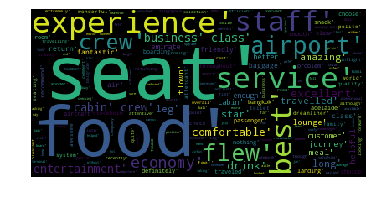

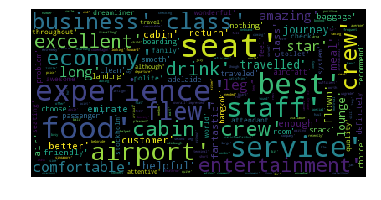

In [115]:
# Generate wordcloud for Qatar positive reviews
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

text = str(q_pos)


# Generate a word cloud image
q_wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(q_wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
q_wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(q_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

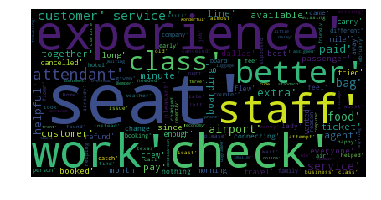

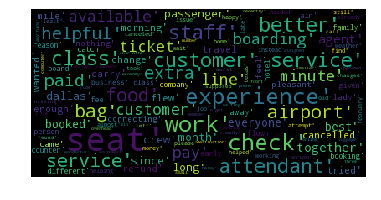

In [116]:
# Generate wordcloud for American positive reviews

text2 = str(a_pos)


# Generate a word cloud image
a_wordcloud = WordCloud().generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(a_wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
a_wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text2)
plt.figure()
plt.imshow(a_wordcloud)
plt.axis("off")

Now we'll look at the negative review and generate wordclouds.

In [123]:
# remove extra brackets from Qatar negative data
q_negative_review_tokens = [x for y in q_negative_review for x in y]

q_neg = []
for i in q_negative_review_tokens:
    q_neg.append(i.encode('ascii'))
    
# count words in list
from collections import Counter
q_negative_review_wordcounts= Counter(q_neg)
q_negative_review_wordcounts.most_common(10)

[('seat', 41),
 ('crew', 32),
 ('service', 31),
 ('passenger', 27),
 ('customer', 25),
 ('airport', 21),
 ('meal', 21),
 ('food', 20),
 ('experience', 18),
 ('class', 17)]

In [128]:
# remove extra brackets from American negative data
a_negative_review_tokens = [x for y in a_negative_review for x in y]

a_neg = []
for i in a_negative_review_tokens:
    a_neg.append(i.encode('ascii'))
    
# count words in list
from collections import Counter
a_negative_review_wordcounts= Counter(a_neg)
a_negative_review_wordcounts.most_common(10)

[('service', 171),
 ('customer', 157),
 ('seat', 147),
 ('plane', 141),
 ('worst', 99),
 ('delayed', 93),
 ('airport', 93),
 ('experience', 91),
 ('bag', 75),
 ('staff', 73)]

It is interesting that many of the same words that were common in the positive review are also common in the negative reviews (seat, service, experience, etc.)

In [129]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['ice', 'from','the','not', 'with', 'airlines', 'plane','that', 'flight', 'qatar', 'doha', 'leg', 'melbourne', 'month'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in q_negative_review]
texts2 = [[word for word in text if word not in stoplist] for text in a_negative_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
texts2 = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts2]

In [126]:
# remove extra brackets from Qatar negative data
q_cleaned_negative_review_tokens = [x for y in texts for x in y]

q_neg = []
for i in q_cleaned_negative_review_tokens:
    q_neg.append(i.encode('ascii'))

# word frequency on positive reviews
q_negative_review_wordcounts= Counter(neg)

q_negative_review_wordcounts.most_common(20)

[('seat', 41),
 ('crew', 32),
 ('service', 31),
 ('passenger', 27),
 ('customer', 25),
 ('airport', 21),
 ('meal', 21),
 ('food', 20),
 ('experience', 18),
 ('class', 17),
 ('business', 17),
 ('worst', 15),
 ('cabin', 15),
 ('delay', 13),
 ('gate', 13),
 ('boarding', 12),
 ('staff', 12),
 ('air', 12),
 ('arrived', 10),
 ('old', 10)]

In [130]:
# remove extra brackets from American negative data
a_cleaned_negative_review_tokens = [x for y in texts2 for x in y]

a_neg = []
for i in a_cleaned_negative_review_tokens:
    a_neg.append(i.encode('ascii'))

# word frequency on positive reviews
a_negative_review_wordcounts= Counter(a_neg)

a_negative_review_wordcounts.most_common(20)

[('service', 171),
 ('customer', 157),
 ('seat', 147),
 ('worst', 99),
 ('delayed', 93),
 ('airport', 93),
 ('experience', 91),
 ('bag', 75),
 ('staff', 73),
 ('rude', 71),
 ('gate', 70),
 ('check', 55),
 ('delay', 54),
 ('passenger', 52),
 ('missed', 51),
 ('ticket', 49),
 ('late', 49),
 ('problem', 49),
 ('minute', 48),
 ('horrible', 45)]

(-0.5, 399.5, 199.5, -0.5)

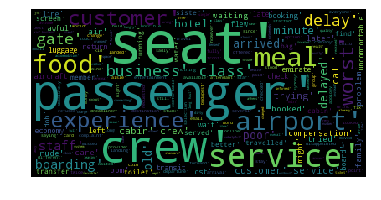

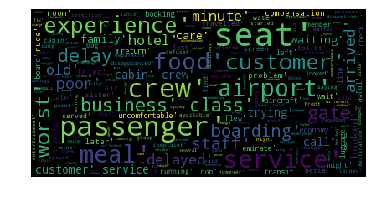

In [127]:
# Generate wordcloud for Qatar negative reviews

text = str(q_neg)

# Generate a word cloud image
q_wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(q_wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
q_wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(q_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

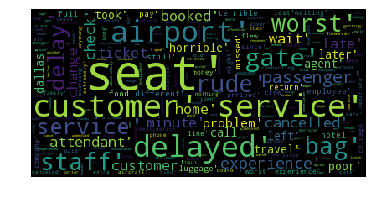

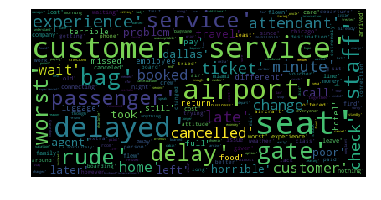

In [131]:
# generate wordcloud for American negative reviews
text2 = str(a_neg)

# Generate a word cloud image
a_wordcloud = WordCloud().generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(a_wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
a_wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text2)
plt.figure()
plt.imshow(a_wordcloud)
plt.axis("off")

# Network Analysis
(Brief look at word networks)

In [133]:
# Clean and preprocess Qatar reviews to build network analysis
datas1 = []

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts2 = [[lmtzr.lemmatize(word) for word in text ] for text in q_positive_review]
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['ice', 'from','the','not', 'with', 'airlines', 'plane','that','flight', 'qatar', 'doha', 'airway', 'worst', 'flew','ha', 'dublin',
           'may', 'world', 'nearly'])
stoplist = set(stoplist) | more 
texts3 = [[word for word in text if word not in stoplist] for text in texts2]
wo = [x for x in texts3 if x]
datas1.append(wo)

In [134]:
#remove extra brackets
datas1 = [x for y in datas1 for x in y]

In [135]:
# Display a few word networks
from itertools import combinations
cowords = [x for d in datas1 for x in combinations(d, 2)]
cowords[:10]

[('booking', 'agent'),
 ('booking', 'breeze'),
 ('booking', 'reasonable'),
 ('booking', 'price'),
 ('booking', 'november'),
 ('booking', 'adelaide'),
 ('booking', 'belgrade'),
 ('booking', 'without'),
 ('booking', u'problem'),
 ('booking', 'felt')]

In [136]:
#for cohashtag analysis
outfile = open("data/coword_network.csv", "wb")
w = csv.writer(outfile)
for i in cowords:
    w.writerow(i)    
outfile.close()

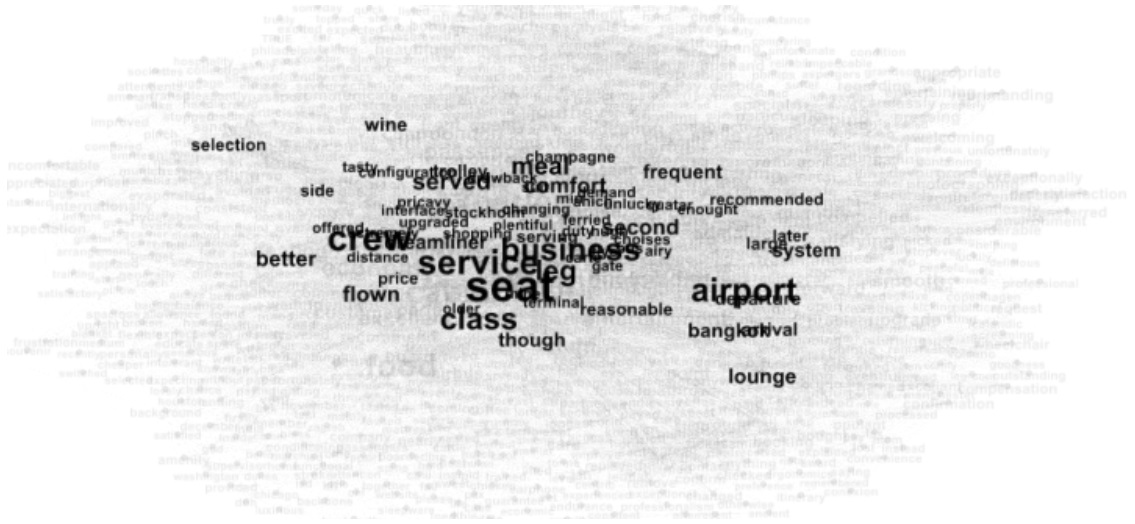

In [137]:
from IPython.display import Image
Image("data/coword1.jpg")

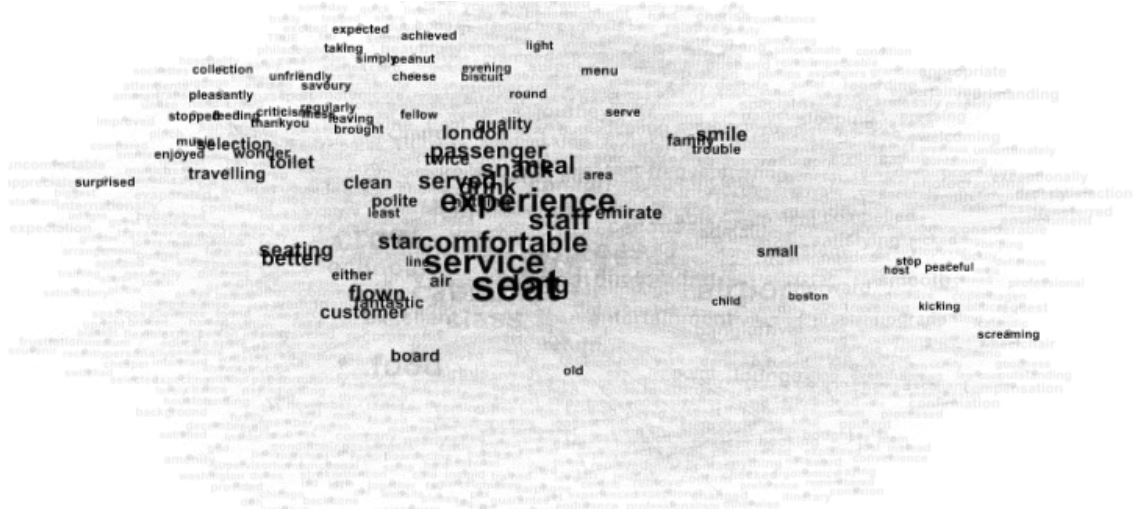

In [138]:
from IPython.display import Image
Image("data/coword2.jpg")

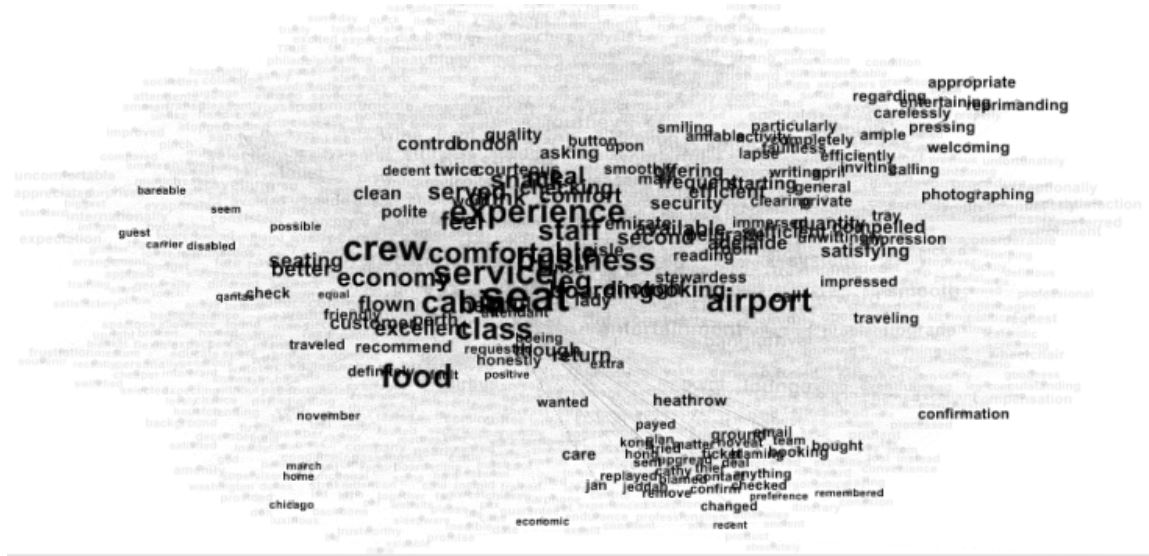

In [139]:
from IPython.display import Image
Image("data/coword3.jpg")

# Final analysis & storytelling  

The above analysis shows that, although entertainment and food and beverages have the lowest correlation with overall customer satisfaction (reference the heatmaps displayed above), American Airlines has a lot of room for improvement in these areas. These two areas along with value for money were their lowest rated categories.  
You can also see that value for money was Qatar Airlines lowest category. Based on this, I would not recommend focussing on value for money. If the onboard services (entertainment and food/beverage) are improved it can be reasonably assumed that the overall ratings will see a positive increase.  


The groupby tables above also show that American Airlines had a significantly larger portion of "No" recommendations for their economy class than Qatar did. With this information, it would be very wise for American to take a close look at their operations in those sections and do more analysis to find ways to improve customer experiences. 

The American Airlines negative review wordcloud shows that there are many negative reviews that pertain to categories that they can affect. The top 5 most mentioned words in the negative reviews category were "service", "customer", "seat", "worst", and "delayed". It would be hard for them to make changes to the "seat" category without revamping their entire fleet, but they have the ability to improve their customer service. They may not be able to affect the delays either, especially if they are weather related. How they treat their customers during those delays can make all of the difference in the world though. Becoming more customer oriented, especially when customers are experiencing stressful situations (delays), will make the customers remember how well they were cared for. Again, putting all of this data together is only the first step. Now that certain areas have been identified, it is up to the airline to find ways to implement change.


The bottom line is that it can be extremely difficult to successfully implement changes without affecting areas that you didn't mean to affect. Changing one thing to make it better may have negative impacts on other categories so care must be taken. It should also be noted that although American Airlines had significantly lower results than Qatar, customer data can be hard to analyze. By no means should the input be ignored but it should be taken with a grain of salt. It is common that people in general are more likely to provide a negative review from a bad experience than they are to provide a positive review for a good experience. A lot of the data may be looking at extreme cases. That being said, every little bit of input can definately help a business find ways to improve. 